In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling
import seaborn as sns
import itertools
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('C:/Users/Jitesh Chandani/Desktop/Data Set.xlsx')

In [3]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [5]:
df.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,...,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,...,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,1.000000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1.000000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.00000,2.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,3.000000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.00000,7.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,4.000000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.00000,15.000000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.00000,5.000000,1.000000,79.000000,6.000000,23.000000,5.000000,6.0000,1.00000,52.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['Total_Spend']=df.cardspent+df.card2spent
df.drop(['custid','cardspent','card2spent'],axis=1,inplace=True)

In [7]:
#output = pandas_profiling.ProfileReport(df)
#output.to_file('pandas_profiling.html')

Checking Normal Distribution of target variable

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Spend', ylabel='Density'>

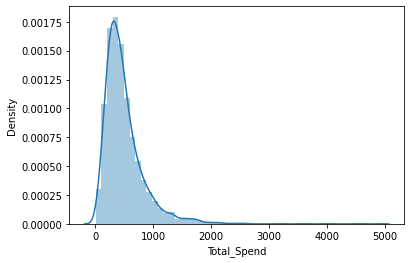

In [8]:
sns.distplot(df.Total_Spend)

In [9]:
# Normalising by log
df['log_Total_Spend']=np.log(df['Total_Spend'])

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Total_Spend', ylabel='Density'>

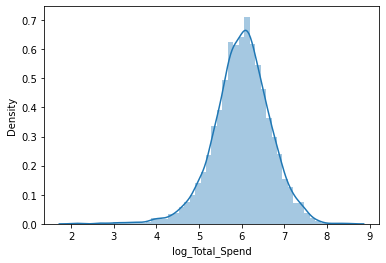

In [11]:
sns.distplot(df.log_Total_Spend)

# Numerical and Categorical variables

In [13]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object', 'O']]

In [14]:
numeric_var_names

['region',
 'townsize',
 'gender',
 'age',
 'agecat',
 'ed',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'income',
 'lninc',
 'inccat',
 'debtinc',
 'creddebt',
 'lncreddebt',
 'othdebt',
 'lnothdebt',
 'default',
 'jobsat',
 'marital',
 'spoused',
 'spousedcat',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carvalue',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutetime',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenureca

In [15]:
cat_var_names

['birthmonth']

Since birthmonth is not an important variable, we will not use this variable

In [16]:
data_num=df[numeric_var_names]
data_num.head(5)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_Spend,log_Total_Spend
0,1,2.0,1,20,2,15,3,1,1,0,...,0,1,1,0,0,0,1,0,149.46,5.007029
1,5,5.0,0,22,2,17,4,2,0,0,...,1,1,1,1,1,0,0,0,77.54,4.350794
2,3,4.0,1,67,6,14,2,2,0,16,...,0,0,0,0,1,0,0,0,359.97,5.886021
3,4,3.0,0,23,2,16,3,2,0,0,...,1,1,1,0,1,1,0,0,359.41,5.884464
4,2,2.0,0,26,3,16,3,2,0,1,...,1,0,1,0,0,0,1,0,507.83,6.230147


# Data Audit Report

In [17]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

data_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,1.500700e+04,3.001400,3.00000,1.421760,2.021402,0.473699,1.000000,1.000000,1.000000,1.000000,2.000000,3.00000,4.000000,5.000000,5.000000,5.000000,5.000000
townsize,4998.0,2.0,1.343100e+04,2.687275,3.00000,1.425925,2.033262,0.530621,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000,4.000000,5.000000,5.000000,5.000000,5.000000
gender,5000.0,0.0,2.518000e+03,0.503600,1.00000,0.500037,0.250037,0.992925,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
age,5000.0,0.0,2.351280e+05,47.025600,47.00000,17.770338,315.784902,0.377886,18.000000,18.000000,20.000000,23.000000,31.000000,47.00000,62.000000,72.000000,76.000000,79.000000,79.000000
agecat,5000.0,0.0,2.119400e+04,4.238800,4.00000,1.308785,1.712917,0.308763,2.000000,2.000000,2.000000,2.000000,3.000000,4.00000,5.000000,6.000000,6.000000,6.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
response_01,5000.0,0.0,4.180000e+02,0.083600,0.00000,0.276815,0.076626,3.311180,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000
response_02,5000.0,0.0,6.490000e+02,0.129800,0.00000,0.336117,0.112975,2.589498,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000
response_03,5000.0,0.0,5.130000e+02,0.102600,0.00000,0.303466,0.092092,2.957759,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000
Total_Spend,5000.0,0.0,2.490393e+06,498.078630,414.25000,351.529270,123572.827720,0.705771,8.110000,58.197600,133.106000,184.033000,276.282500,414.25000,615.562500,908.125000,1145.146500,1760.102400,4881.050000


In [18]:
num_summary=data_num.apply(var_summary).T
num_summary.to_csv('num_summary.csv')

# Outliers

In [19]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

data_num=data_num.apply(outlier_capping)

# Missing Values

In [20]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(Missing_imputation)

In [21]:
data_new = data_num
data_new.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_Spend,log_Total_Spend
0,1,2.0,1,20,2,15,3,1,1,0,...,0,1,1,0,0,0,1,0,149.46,5.007029
1,5,5.0,0,22,2,17,4,2,0,0,...,1,1,1,1,1,0,0,0,77.54,4.350794
2,3,4.0,1,67,6,14,2,2,0,16,...,0,0,0,0,1,0,0,0,359.97,5.886021
3,4,3.0,0,23,2,16,3,2,0,0,...,1,1,1,0,1,1,0,0,359.41,5.884464
4,2,2.0,0,26,3,16,3,2,0,1,...,1,0,1,0,0,0,1,0,507.83,6.230147


# Co-relation

In [22]:
# correlation matrix (ranges from 1 to -1)
corrm=data_new.corr()
corrm.to_csv('corrm.csv')
corrm

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_Spend,log_Total_Spend
region,1.000000,0.414026,-0.012810,-0.026525,-0.018455,0.013850,0.015710,-0.004717,-0.013768,-0.010204,...,0.020596,0.007504,0.026391,0.036622,0.012312,-0.013004,0.005899,0.005694,0.042694,0.039216
townsize,0.414026,1.000000,0.009576,-0.075399,-0.069017,0.002968,0.003744,-0.010768,-0.019846,-0.059221,...,0.002639,0.005333,0.007898,-0.000562,-0.028756,-0.006252,-0.010070,-0.007230,-0.008651,0.006132
gender,-0.012810,0.009576,1.000000,-0.010186,-0.007427,-0.000777,-0.002673,-0.016470,0.000311,-0.011756,...,-0.006963,-0.021319,0.001164,0.009167,-0.020837,0.018058,0.001385,-0.009685,-0.077512,-0.078605
age,-0.026525,-0.075399,-0.010186,1.000000,0.969879,-0.093966,-0.081129,0.037709,0.011206,0.705515,...,-0.133284,-0.217524,-0.235226,-0.042090,0.365204,0.015140,0.013175,-0.026231,0.031680,0.007270
agecat,-0.018455,-0.069017,-0.007427,0.969879,1.000000,-0.078331,-0.064124,0.032554,0.004465,0.679902,...,-0.123192,-0.208690,-0.223387,-0.029310,0.348275,0.010039,0.010467,-0.014860,0.051619,0.030192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
response_01,-0.013004,-0.006252,0.018058,0.015140,0.010039,-0.117333,-0.112653,0.000137,-0.010492,0.039085,...,-0.107194,-0.069870,-0.096176,-0.014592,0.020919,1.000000,-0.015601,-0.018781,-0.008449,-0.009182
response_02,0.005899,-0.010070,0.001385,0.013175,0.010467,0.073750,0.070172,0.002888,0.006431,0.014410,...,0.039891,0.015485,0.011744,0.032549,0.030136,-0.015601,1.000000,0.028266,0.023892,0.026831
response_03,0.005694,-0.007230,-0.009685,-0.026231,-0.014860,0.107912,0.106223,-0.008415,0.004479,-0.029312,...,0.089388,0.072791,0.094278,0.093360,-0.011148,-0.018781,0.028266,1.000000,0.051291,0.061573
Total_Spend,0.042694,-0.008651,-0.077512,0.031680,0.051619,0.100943,0.098842,0.002436,0.011456,0.091386,...,0.050454,0.030406,0.026851,0.060171,0.041757,-0.008449,0.023892,0.051291,1.000000,0.909423


<AxesSubplot:>

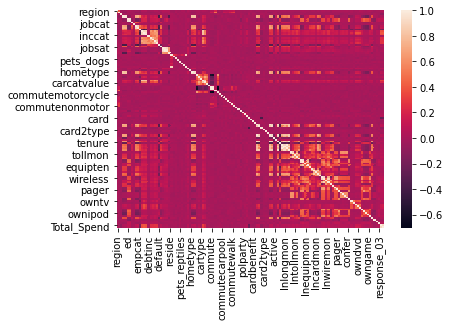

In [23]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_new.corr())

# Dropping columns based on data audit report
    - Based on low variance (near zero variance)
    - High correlations between two numerical variables

In [25]:
data_new.drop(columns=['commutemotorcycle','commutepublic','commutenonmotor','lncardten','response_01','commutecat'],axis=1,inplace=True)

In [26]:
data_new.shape


(5000, 122)

# Feature Selection

F-Regression

In [27]:
# Feature Selection based on importance
features = data_new[data_new.columns.difference(['log_Total_Spend','Total_Spend'])]
target = data_new['log_Total_Spend']
F_values, p_values  = f_regression(features, target )

In [28]:
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results.loc[80:]

,Variable,F_Value,P_Value
80,owndvd,138.282716,0.000
81,ownfax,19.784973,0.000
82,owngame,8.693023,0.003
83,ownipod,8.424830,0.004
84,ownpc,9.851560,0.002
85,ownpda,24.646407,0.000
86,owntv,36.512224,0.000
87,ownvcr,125.995381,0.000
88,pager,16.789264,0.000
89,pets,0.112238,0.738


In [29]:
f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)
f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.1]
f_reg_results_new

,Variable,F_Value,P_Value
1,address,11.355096,0.001
2,addresscat,27.886843,0.000
4,agecat,4.560250,0.033
5,bfast,4.065689,0.044
7,callid,15.603747,0.000
...,...,...,...
115,voice,10.132465,0.001
116,vote,15.628862,0.000
117,wireless,27.549439,0.000
118,wiremon,38.275030,0.000


Recursive Feature Elimination (RFE)

In [30]:
ligreg = LinearRegression()
rfe = RFE(ligreg, 15)
rfe = rfe.fit(features, target )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False  True False  True False  True False False False False False  True
 False False False False False False False False  True  True False False
 False False  True False False False False False False False  True  True
 False False False False False False False False  True False False False
 False False False False False False False  True False False False False]
[ 19  73  29  72  49  80  20  34  97   6  25  23   1   1  75   2  93  65
  78  99  41 100 103  94   8  77  22  70  55  90  17  79   9  24  15  16
  38  89  50  33  86  95   1  11  81  32  48  96  46  47 102  68   1  28
  27  85  37 105  12  31  44   1  51   1  36   1  

In [31]:
feature_map = [(i, v) for i, v in itertools.zip_longest(features.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=features.columns[rfe.get_support()]

selected_features_from_rfe = features[RFE_features]

In [32]:
RFE_features

Index(['card', 'card2', 'default', 'gender', 'lncardmon', 'lnequipmon',
       'lninc', 'lnwiremon', 'owndvd', 'ownfax', 'owntv', 'pets_reptiles',
       'pets_saltfish', 'response_03', 'voice'],
      dtype='object')

Select K-Best

In [33]:
X_new = SelectKBest(f_classif, k=15).fit(features, target )

In [34]:
X_new.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [35]:
X_new.scores_

array([0.99558822, 0.92536224, 0.96810654, 0.90102018, 0.97085501,
       1.08477987, 1.04965806, 0.96246007, 0.94495912, 0.97175901,
       1.00279754, 1.08036098, 1.10262509, 1.19796941, 1.15461919,
       1.10060702, 1.02745464, 1.09267391, 0.90447528, 1.01883609,
       0.96917035, 0.96847512, 0.98360157, 1.01073485, 1.03350843,
       0.95537703, 1.06514188, 1.11380553, 1.01612211, 1.03295509,
       1.12647526, 1.0161885 , 1.10381263, 0.95756014, 0.98967281,
       1.08831692, 1.00918474, 1.07587409, 0.96001115, 0.94425906,
       1.0968984 , 1.08891051, 1.38527749, 1.0836507 , 1.23246133,
       1.21112998, 1.05898102, 0.89683123, 1.04516152, 0.9505109 ,
       0.81683679, 0.89335496, 1.03391763, 0.99849439, 0.95652301,
       0.97615846, 1.27823138, 0.87840249, 1.08031759, 0.99283896,
       0.91835811, 1.04651155, 1.23196921, 0.82458932, 1.14113741,
       1.12062586, 1.08425725, 1.16052171, 1.16172981, 1.18947344,
       1.37732299, 0.89692194, 1.34423878, 1.10621556, 1.10025

In [36]:
feature_map = [(i, v) for i, v in itertools.zip_longest(features.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=features.columns[X_new.get_support()]

selected_features_from_KBest = features[KBest_features]

In [37]:
KBest_features

Index(['card2', 'card2benefit', 'default', 'ed', 'edcat', 'inccat',
       'lncreddebt', 'lnlongten', 'lnothdebt', 'lntollmon', 'lntollten',
       'lnwireten', 'ownpda', 'pets_saltfish', 'response_03'],
      dtype='object')

# Variance Inflation Factor (VIF)

In [38]:
X = pd.concat([features,target], axis=1)
features = "+".join(data_new.columns.difference(['log_Total_Spend','Total_Spend']))
X.head()

,active,address,addresscat,age,agecat,bfast,callcard,callid,callwait,carbought,...,tollmon,tollten,townsize,union,voice,vote,wireless,wiremon,wireten,log_Total_Spend
0,0,0,1,20,2,3,1,0,1,0,...,29.0,161.05,2.0,1,1,1,0,0.00,0.00,5.007029
1,1,2,1,22,2,1,1,1,0,0,...,0.0,0.00,5.0,0,1,0,1,45.65,1683.55,4.350794
2,0,30,5,67,6,3,1,0,0,0,...,0.0,0.00,4.0,0,0,0,0,0.00,0.00,5.886021
3,1,3,2,23,2,1,1,0,0,0,...,0.0,0.00,3.0,0,0,0,0,0.00,0.00,5.884464
4,1,3,2,26,3,3,1,1,1,0,...,16.5,387.70,2.0,0,1,0,1,19.05,410.80,6.230147


In [39]:
features

'active+address+addresscat+age+agecat+bfast+callcard+callid+callwait+carbought+carbuy+carcatvalue+card+card2+card2benefit+card2fee+card2tenure+card2tenurecat+card2type+cardbenefit+cardfee+cardmon+cardten+cardtenure+cardtenurecat+cardtype+carown+cars+cartype+carvalue+churn+commute+commutebike+commutebus+commutecar+commutecarpool+commuterail+commutetime+commutewalk+confer+creddebt+debtinc+default+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+gender+homeown+hometype+hourstv+inccat+income+internet+jobcat+jobsat+lncardmon+lncreddebt+lnequipmon+lnequipten+lninc+lnlongmon+lnlongten+lnothdebt+lntollmon+lntollten+lnwiremon+lnwireten+longmon+longten+marital+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+pets+pets_birds+pets_cats+pets_dogs+pets_freshfish+pets_reptiles+pets_saltfish+pets_small+polcontrib+polparty+polview+reason+region+reside+response_02+response_03+retire+spoused+spousedcat+telecommute+tenure+tollfree+tollmon+tollten+townsi

In [40]:
a,b = dmatrices(formula_like='log_Total_Spend ~ '+ 'address+addresscat+agecat+bfast+callid+callwait+carcatvalue+card+card2+card2tenure+card2tenurecat+cardten+cardtenure+cardtenurecat+carown+carvalue+commutebike+confer+creddebt+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+gender+homeown+hourstv+inccat+income+internet+jobsat+lncreddebt+lnequipmon+lnequipten+lninc+lnlongmon+lnlongten+lnothdebt+lntollmon+lntollten+lnwiremon+lnwireten+longmon+longten+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+polcontrib+region+response_02+response_03+retire+spoused+spousedcat+tenure+tollfree+tollmon+tollten+voice+vote+wireless+wiremon+wireten', data = data_new, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

      VIF Factor    features
0   39085.376807   Intercept
1       9.368387     address
2      10.324385  addresscat
3       5.276725      agecat
4       1.057179       bfast
..           ...         ...
73      2.196261       voice
74      1.045693        vote
75    180.600350    wireless
76    268.108684     wiremon
77     25.650730     wireten

[78 rows x 2 columns]


# Final list of variable selected for the model building from above steps

In [41]:
feature_columns=['address','age','addresscat','agecat','bfast','callid','callwait','carcatvalue','card','card2','card2tenure',
'card2tenurecat','cardten','cardtenure','cardtenurecat','carown','carvalue','commutebike','confer','creddebt','ebill','ed',
'edcat','empcat','employ','equip','equipmon','equipten','forward','gender','homeown','hourstv','inccat','income','internet',
'jobsat','lncreddebt','lnequipmon','lnequipten','lninc','lnlongmon','lnlongten','lnothdebt','lntollmon','lntollten',
 'lnwiremon','lnwireten','longmon','longten','multline','news','othdebt','owncd','owndvd','ownfax','owngame','ownipod','ownpc',
'ownpda','owntv','ownvcr','pager','polcontrib','region','response_02','response_03','retire','spoused','spousedcat','tenure',
'tollfree','tollmon','tollten','voice','vote','wireless','wiremon','wireten']

In [42]:
data_new=pd.concat([data_new[feature_columns],data_new['log_Total_Spend']],axis=1)

# Transforming Variables

In [43]:
y=data_new.log_Total_Spend
def corr_check(x):
    c1=y.corr(x)
    c2=y.corr(np.log(x+1))
    c3=y.corr(np.sqrt(x))
    c4=y.corr(np.square(x))
    c5=y.corr(np.cbrt(x))
    res=pd.Series([c1,c2,c3,c4,c5],index=['x','log_x','sqrt_x','sq_x','cbrt_x'])
    return res

corr_advanced=data_new.apply(corr_check)
corr_advanced=corr_advanced.T

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
corr_advanced

,x,log_x,sqrt_x,sq_x,cbrt_x
address,0.047611,0.090261,0.074661,0.013326,0.084797
age,0.007270,0.040056,0.024209,-0.024673,0.029830
addresscat,0.074489,0.084576,0.081751,0.059356,0.083928
agecat,0.030192,0.049023,0.042262,0.006428,0.046194
bfast,0.028510,0.024890,0.025725,0.033298,0.024768
...,...,...,...,...,...
vote,0.055833,0.055833,0.055833,0.055833,0.055833
wireless,0.074040,0.074040,0.074040,0.074040,0.074040
wiremon,0.087177,0.079042,0.082582,0.086781,0.080157
wireten,0.097513,0.085286,0.096367,0.087110,0.092804


# Choose variable transformation according to higher correlation value.

Variables to not transform : callid, callwait, commutebike, confer, ebill, ed, edcat, equip, forward, gender, homeown, multline, news, owncd, owndvd, ownfax, owngame, ownipod, ownpc, ownpda, owntv, ownvcr, pager, polcontrib, response_02, response_03, retire, tollfree, tollten, voice, vote, wireless, wiremon, wireten, lncreddebt, lnlongten, lnothdebt

Variables to transform to log : address, addresscat, agecat, card, card2, card2tenurecat, cardtenure, cardtenurecat, empcat, employ, longten, othdebt, tenure, hourstv, income, lnlongmon, longmon, longten

In [45]:
data_new['log_address']=data_new['address'].apply(lambda x:np.log(x+1))
data_new['log_addresscat']=data_new['addresscat'].apply(lambda x:np.log(x+1))
data_new['log_agecat']=data_new['agecat'].apply(lambda x:np.log(x+1))
data_new['log_card']=data_new['card'].apply(lambda x:np.log(x+1))
data_new['log_card2']=data_new['card2'].apply(lambda x:np.log(x+1))
data_new['log_card2tenurecat']=data_new['card2tenurecat'].apply(lambda x:np.log(x+1))
data_new['log_cardtenure']=data_new['cardtenure'].apply(lambda x:np.log(x+1))
data_new['log_cardtenurecat']=data_new['cardtenurecat'].apply(lambda x:np.log(x+1))
data_new['log_empcat']=data_new['empcat'].apply(lambda x:np.log(x+1))
data_new['log_employ']=data_new['employ'].apply(lambda x:np.log(x+1))
data_new['log_longten']=data_new['longten'].apply(lambda x:np.log(x+1))
data_new['log_othdebt']=data_new['othdebt'].apply(lambda x:np.log(x+1))
data_new['log_tenure']=data_new['tenure'].apply(lambda x:np.log(x+1))
data_new['log_hourstv']=data_new['hourstv'].apply(lambda x:np.log(x+1))
data_new['log_income']=data_new['income'].apply(lambda x:np.log(x+1))
data_new['log_lnlongmon']=data_new['lnlongmon'].apply(lambda x:np.log(x+1))
data_new['log_longmon']=data_new['longmon'].apply(lambda x:np.log(x+1))
data_new['log_longten']=data_new['longten'].apply(lambda x:np.log(x+1))

Variables to transform to square root : carcatvalue, cardten, carown, carvalue, spoused, spousedcat, inccat, jobsat

In [46]:
data_new['sqrt_carcatvalue']=data_new['carcatvalue'].apply(lambda x:np.sqrt(x))
data_new['sqrt_cardten']=data_new['cardten'].apply(lambda x:np.sqrt(x))
data_new['sqrt_carown']=data_new['carown'].apply(lambda x:np.sqrt(x))
data_new['sqrt_carvalue']=data_new['carvalue'].apply(lambda x:np.sqrt(x))
data_new['sqrt_spoused']=data_new['spoused'].apply(lambda x:np.sqrt(x))
data_new['sqrt_spousedcat']=data_new['spousedcat'].apply(lambda x:np.sqrt(x))
data_new['sqrt_inccat']=data_new['inccat'].apply(lambda x:np.sqrt(x))
data_new['sqrt_jobsat']=data_new['jobsat'].apply(lambda x:np.sqrt(x))

Variables to transform to square : bfast, equipmon, equipten, tollmon, internet, lnequipmon, lnequipten, lntollmon, lntollten, lnwiremon

In [47]:
data_new['sq_bfast']=data_new['bfast'].apply(lambda x:np.square(x))
data_new['sq_equipmon']=data_new['equipmon'].apply(lambda x:np.square(x))
data_new['sq_equipten']=data_new['equipten'].apply(lambda x:np.square(x))
data_new['sq_tollmon']=data_new['tollmon'].apply(lambda x:np.square(x))
data_new['sq_internet']=data_new['internet'].apply(lambda x:np.square(x))
data_new['sq_lnequipmon']=data_new['lnequipmon'].apply(lambda x:np.square(x))
data_new['sq_lnequipten']=data_new['lnequipten'].apply(lambda x:np.square(x))
data_new['sq_lntollmon']=data_new['lntollmon'].apply(lambda x:np.square(x))
data_new['sq_lntollten']=data_new['lntollten'].apply(lambda x:np.square(x))
data_new['sq_lnwiremon']=data_new['lnwiremon'].apply(lambda x:np.square(x))

variables to transform to cube root : card2tenure, creddebt, region, lninc

In [48]:
data_new['cbrt_card2tenure']=data_new['card2tenure'].apply(lambda x:np.cbrt(x))
data_new['cbrt_creddebt']=data_new['creddebt'].apply(lambda x:np.cbrt(x))
data_new['cbrt_region']=data_new['region'].apply(lambda x:np.cbrt(x))
data_new['cbrt_lninc']=data_new['lninc'].apply(lambda x:np.cbrt(x))

# Train-Test Split

In [49]:
train, test = train_test_split( data_new,test_size = 0.3,random_state = 1234 )

In [51]:
train.shape

(3500, 118)

In [52]:
test.shape

(1500, 118)

# Linear Regression Model

In [53]:
lm = smf.ols("log_Total_Spend~callid+callwait+commutebike+confer+ebill+ed+edcat+equip+forward+gender+homeown+multline+news+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+polcontrib+response_02+response_03+retire+tollfree+tollten+voice+vote+wireless+wiremon+wireten+lncreddebt+lnlongten+lnothdebt+log_address+log_addresscat+log_agecat+log_card+log_card2+log_card2tenurecat+log_cardtenure+log_cardtenurecat+log_empcat+log_employ+log_longten+log_othdebt+log_tenure+log_hourstv+log_income+log_lnlongmon+log_longmon+log_longten+sqrt_carcatvalue+sqrt_cardten+sqrt_carown+sqrt_carvalue+sqrt_spoused+sqrt_spousedcat+sqrt_inccat+sqrt_jobsat+sq_bfast+sq_equipmon+sq_equipten+sq_tollmon+sq_internet+sq_lnequipmon+sq_lnequipten+sq_lntollmon+sq_lntollten+sq_lnwiremon+cbrt_card2tenure+cbrt_creddebt+cbrt_region+cbrt_lninc", data=train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Total_Spend   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     10.03
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           7.06e-88
Time:                        12:35:50   Log-Likelihood:                -1189.2
No. Observations:                1540   AIC:                             2532.
Df Residuals:                    1463   BIC:                             2944.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.5154      2

Reduce the variables to 15 by p-value.

In [54]:
lm = smf.ols("log_Total_Spend~gender+ownvcr+voice+wireten+log_card+log_card2+log_cardtenure+log_longten+log_tenure+log_income+log_lnlongmon+log_longten+sqrt_cardten+sqrt_spoused+sqrt_spousedcat+sq_internet", data=train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Total_Spend   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     51.62
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          1.23e-126
Time:                        12:36:15   Log-Likelihood:                -1341.6
No. Observations:                1706   AIC:                             2715.
Df Residuals:                    1690   BIC:                             2802.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7170      0.280     

# Final list of variable selected for the model building from above steps

In [55]:
feature_columns=['gender', 'ownvcr', 'voice', 'wireten', 'log_card', 'log_card2', 'log_cardtenure', 'log_longten', 
                 'log_tenure', 'log_income', 'log_lnlongmon', 'sqrt_cardten', 'sqrt_spoused', 'sqrt_spousedcat', 'sq_internet']

data_new=pd.concat([data_new[feature_columns],data_new['log_Total_Spend']],axis=1)

In [57]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_new=data_new.apply(Missing_imputation)

In [58]:
train, test = train_test_split( data_new,test_size = 0.3,random_state = 1234 )

In [59]:
lm.predict(train)

4735    6.240865
1796    6.435741
479     6.279900
2524    6.411940
1565    6.132713
          ...   
664     5.888830
3276    5.727449
1318    6.146643
723     5.766932
2863    6.719157
Length: 3500, dtype: float64

Predict the Y (Scoring the train & test and validate the results)

In [60]:
pd.set_option('mode.chained_assignment', None)  # For SettingWithCopyWarning
train.loc[:,'pred_ln_spend'] = lm.predict(train)
test.loc[:,'pred_ln_spend']  = lm.predict(test)

In [61]:
pd.set_option('mode.chained_assignment', None)  # For SettingWithCopyWarning
train.loc[:,'actual_spend'] = np.exp(train.log_Total_Spend)
test.loc[:,'actual_spend'] = np.exp(test.log_Total_Spend)

train.loc[:,'pred_spend'] = np.exp(train.pred_ln_spend)
test.loc[:,'pred_spend'] = np.exp(test.pred_ln_spend)

# Accuracy Metrics

In [62]:
#Train Data
MAPE_train = np.mean(np.abs(train.actual_spend - train.pred_spend)/train.actual_spend )
print(MAPE_train)

#Test Data
MAPE_test = np.mean(np.abs(test.actual_spend - test.pred_spend)/test.actual_spend )
print(MAPE_test)

0.49172041171476744
0.5000110201311911


In [63]:
# mean squared error
mse = np.sum((train.pred_spend - train.actual_spend)**2)
print('mean squared error : ',mse)

# root mean squared error
rmse = np.sqrt(mse/train.pred_spend.shape[0])
print('root mean squared error : ',rmse)

mean squared error :  281288653.2294012
root mean squared error :  283.49283348432596


In [64]:
# sum of square of residuals
ssr = np.sum((train.pred_spend - train.actual_spend)**2)
print('sum of square of residuals : ',ssr)

#  total sum of squares
sst = np.sum((train.actual_spend - np.mean(train.actual_spend))**2)
print('total sum of squares : ',sst)

# R2 score
r2_score = 1 - (ssr/sst)
print('R2 score : ',r2_score)

sum of square of residuals :  281288653.2294012
total sum of squares :  378619286.32325196
R2 score :  0.2570672879319552


# Decision Tree Model

In [65]:
X = data_new[feature_columns]
y = data_new['log_Total_Spend']

In [66]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.3,random_state = 56789)

In [67]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_predict

In [68]:
regressor = DecisionTreeRegressor(max_depth=5,random_state=0)  
regressor.fit(train_X, train_y) 

DecisionTreeRegressor(max_depth=5, random_state=0)

In [69]:
y_pred = regressor.predict(test_X)

In [70]:
dt=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})  
dt

,Actual,Predicted
4133,6.289808,6.161825
3771,7.348768,6.709463
26,6.307497,6.161825
2049,5.730652,5.782489
3385,6.283294,6.945632
...,...,...
4001,5.989713,6.227871
2946,6.427734,6.700367
4987,6.043867,5.643628
2533,5.469030,5.643628


In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.4209733929437463
Mean Squared Error: 0.28342948041128285
Root Mean Squared Error: 0.532380954215384


In [72]:
#Let's print the R-squared value for train/test.
print("R-squared for Train:",regressor.score(train_X, train_y))
print("R-squared for Test:",regressor.score(test_X, test_y))

R-squared for Train: 0.3499584051830641
R-squared for Test: 0.2691089555702695


# Tuning the regression tree

In [73]:
# list of values to try
max_depth_range = range(2, 11)

# list to store the average RMSE for each value of max_depth
RMSE_Scores = []
MSE_Scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=345)
    
    MSE_scores = cross_val_score(treereg, train_X, train_y, cv=14, scoring='neg_mean_squared_error')
    
    RMSE_Scores.append(np.mean(np.sqrt(-MSE_scores)))
    MSE_Scores.append(MSE_scores)

In [74]:
print (RMSE_Scores)

[0.5768190828227225, 0.5537142046975918, 0.5437961916158048, 0.5467640388616263, 0.5593132297157453, 0.5720287514141221, 0.5938647885304819, 0.6081356310680116, 0.6306392204887384]


Text(0, 0.5, 'RMSE (lower is better)')

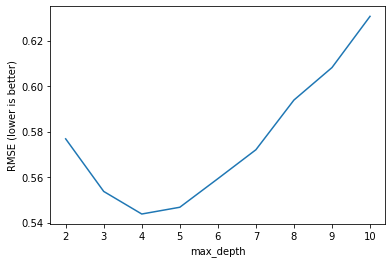

In [75]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_Scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

# Building Final Decision Tree Model

In [76]:
# max_depth=4 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=4, random_state=345)
treereg.fit(train_X, train_y)

DecisionTreeRegressor(max_depth=4, random_state=345)

In [77]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':data_new.columns.difference(['log_Total_Spend','Total_Spend']), 'importance':treereg.feature_importances_})

,feature,importance
0,gender,0.000000
1,log_card,0.000000
2,log_card2,0.000000
3,log_cardtenure,0.000000
4,log_income,0.391315
5,log_lnlongmon,0.168363
6,log_longten,0.000000
7,log_tenure,0.002056
8,ownvcr,0.001811
9,sq_internet,0.436454


# Making predictions for the testing data

In [78]:
pred = treereg.predict(train_X) 
y_pred = treereg.predict(test_X) 

In [79]:
dt=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})  
dt

,Actual,Predicted
4133,6.289808,6.176941
3771,7.348768,6.757886
26,6.307497,6.176941
2049,5.730652,5.726945
3385,6.283294,6.992413
...,...,...
4001,5.989713,6.112519
2946,6.427734,6.651479
4987,6.043867,5.726945
2533,5.469030,5.726945


In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.4213833028647828
Mean Squared Error: 0.28167195716468796
Root Mean Squared Error: 0.5307277618183243


In [81]:
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is.
print("R-squared for Train:",treereg.score(train_X, train_y))
print("R-squared for Test:",treereg.score(test_X, test_y))

R-squared for Train: 0.3283887472941778
R-squared for Test: 0.27364115172519765


# Random Forest Model (RF)

In [82]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5,n_estimators=20, random_state=0)  
rf.fit(train_X, train_y)  
y_pred = rf.predict(test_X) 

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.41481532677407296
Mean Squared Error: 0.27461521439550396
Root Mean Squared Error: 0.5240374169804137


In [85]:
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is.
print("R-squared for Train:",rf.score(train_X, train_y))
print("R-squared for Test:",rf.score(test_X, test_y))

R-squared for Train: 0.3618680988312055
R-squared for Test: 0.29183865921579644


# Tuning a Random Forest

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth': range(3,11),
            'n_estimators': (10, 50, 100)}

In [87]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5, verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(train_X, train_y)

In [88]:
grid_result.best_score_

0.3111097578869916

In [89]:
grid_result.best_params_

{'max_depth': 4, 'n_estimators': 100}

# Building Final Random Forest Model

In [90]:
rfr = RandomForestRegressor(max_depth=4,n_estimators=100, random_state=0)  
rfr.fit(train_X, train_y)  
pred=rfr.predict(train_X)
y_pred = rfr.predict(test_X) 

In [91]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':data_new.columns.difference(['log_Total_Spend','Total_Spend']), 'importance':rfr.feature_importances_})

,feature,importance
0,gender,0.000247
1,log_card,0.000047
2,log_card2,0.000806
3,log_cardtenure,0.002378
4,log_income,0.378484
5,log_lnlongmon,0.170917
6,log_longten,0.001827
7,log_tenure,0.002735
8,ownvcr,0.002349
9,sq_internet,0.431118


In [92]:
dt=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})  
dt

,Actual,Predicted
4133,6.289808,6.219536
3771,7.348768,6.745037
26,6.307497,6.138800
2049,5.730652,5.715447
3385,6.283294,6.924923
...,...,...
4001,5.989713,6.263958
2946,6.427734,6.630084
4987,6.043867,5.713848
2533,5.469030,5.678332


In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.4148738909910144
Mean Squared Error: 0.27473526674430127
Root Mean Squared Error: 0.5241519500529415


In [94]:
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is.
print("R-squared for Train:",rfr.score(train_X, train_y))
print("R-squared for Test:",rfr.score(test_X, test_y))

R-squared for Train: 0.3403152672740941
R-squared for Test: 0.2915290753769121


# KNN

In [95]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [96]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(train_X, train_y)
y_pred=knn.predict(test_X)

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.4897066288343715
Mean Squared Error: 0.3899376909702942
Root Mean Squared Error: 0.6244499106976429


In [98]:
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is.
print("R-squared for Train:",knn.score(train_X, train_y))
print("R-squared for Test:",knn.score(test_X, test_y))

R-squared for Train: 0.30713972466825157
R-squared for Test: -0.005548067202575613


# Tuning a KNN Model

In [99]:
rmse_val = [] #to store rmse values for different k
for K in range(20,70):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_X, train_y)  #fit the model
    pred=model.predict(test_X) #make prediction on test set
    error = sqrt(mean_squared_error(test_y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  21 is: 0.5945473858234941
RMSE value for k=  22 is: 0.5939510991815922
RMSE value for k=  23 is: 0.5942563891483198
RMSE value for k=  24 is: 0.5948942785417207
RMSE value for k=  25 is: 0.5946702858421918
RMSE value for k=  26 is: 0.595871946203172
RMSE value for k=  27 is: 0.5956897822677506
RMSE value for k=  28 is: 0.5959269535278865
RMSE value for k=  29 is: 0.5969829691232769
RMSE value for k=  30 is: 0.597973233184008
RMSE value for k=  31 is: 0.5983157659393573
RMSE value for k=  32 is: 0.5984214835841905
RMSE value for k=  33 is: 0.5981615023316258
RMSE value for k=  34 is: 0.5984099018979694
RMSE value for k=  35 is: 0.598636210512329
RMSE value for k=  36 is: 0.5991338612432252
RMSE value for k=  37 is: 0.5997366775219712
RMSE value for k=  38 is: 0.600043007994911
RMSE value for k=  39 is: 0.6001960542575558
RMSE value for k=  40 is: 0.6001032239159287
RMSE value for k=  41 is: 0.6002109874005997
RMSE value for k=  42 is: 0.6000737570903409
RMSE value for

<AxesSubplot:>

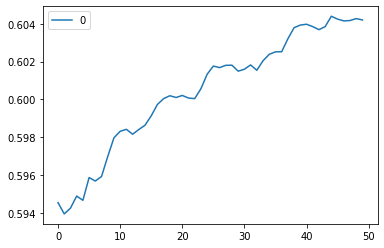

In [100]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# Building Final KNN Model

In [101]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(train_X, train_y)
pred=knn.predict(train_X)
y_pred=knn.predict(test_X)

In [102]:
scores = cross_val_score(knn, train_X, train_y, cv=10, scoring='r2')
scores

array([-0.25330396, -0.45552754, -0.31347134, -0.11039586, -0.43900119,
       -0.46572564, -0.31795404, -0.22439053, -0.31608849, -0.27878126])

In [103]:
dt=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
dt

,Actual,Predicted
4133,6.289808,5.853805
3771,7.348768,6.515788
26,6.307497,6.204217
2049,5.730652,6.000888
3385,6.283294,5.718788
...,...,...
4001,5.989713,4.814310
2946,6.427734,5.949048
4987,6.043867,5.508141
2533,5.469030,6.148546


In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.5558257839757733
Mean Squared Error: 0.4938982590895077
Root Mean Squared Error: 0.7027789546432844


In [105]:
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is.
print("R-squared for Train:",knn.score(train_X, train_y))
print("R-squared for Test:",knn.score(test_X, test_y))

R-squared for Train: 0.568955983734418
R-squared for Test: -0.2736353815563979


Since Random Forest is giving the best accuracy, we will use Random Forest model for the above dataset

# Saving Model

In [112]:
import pickle
with open('rf_pickle','wb') as f:
    pickle.dump(rf,f)

# Predicting from Model

In [113]:
with open('rf_pickle','rb') as f:
    model = pickle.load(f)

In [115]:
np.exp(model.predict(np.array([[0,1,0,2000.25,2,4,23,560.60,60,39,1.83,2,4,3,1]])))

array([649.20128039])

In [116]:
data_new

,gender,ownvcr,voice,wireten,log_card,log_card2,log_cardtenure,log_longten,log_tenure,log_income,log_lnlongmon,sqrt_cardten,sqrt_spoused,sqrt_spousedcat,sq_internet,log_Total_Spend
0,1,1,1,0.00,1.386294,1.791759,1.098612,3.566712,1.791759,3.465736,1.054940,7.745967,3.741657,1.414214,0,5.007029
1,0,1,1,1683.55,1.098612,1.609438,1.609438,5.803929,3.688879,2.772589,1.158782,24.698178,3.741657,1.414214,16,4.350794
2,1,1,0,0.00,1.098612,1.609438,3.583519,7.527982,4.189655,3.583519,1.469345,37.549967,3.605551,1.414214,0,5.886021
3,0,1,0,0.00,1.098612,1.386294,1.791759,5.300565,3.610918,3.044522,1.026672,26.172505,4.242641,2.000000,4,5.884464
4,0,1,1,410.80,1.609438,0.693147,2.197225,4.318821,3.091042,3.178054,0.749122,18.973666,3.605551,1.414214,9,6.230147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0.00,0.693147,1.386294,3.583519,7.786095,4.248495,5.283204,1.510567,39.560081,3.741657,1.414214,0,7.262397
4996,0,1,0,757.35,1.386294,1.791759,2.772589,5.669881,3.433987,4.430817,1.206511,28.284271,3.741657,1.414214,0,5.903589
4997,0,1,0,0.00,0.693147,1.098612,3.713572,7.654562,4.290459,4.691348,1.477276,32.710854,3.741657,1.414214,0,7.331551
4998,0,1,0,0.00,1.386294,1.609438,3.135494,5.647917,3.637586,5.247024,1.122710,18.574176,3.872983,1.732051,9,6.623999
